<a href="https://colab.research.google.com/github/shreesha2304/telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
#firstly uploading the given data for further analysis

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/almabetter/Telecom Churn.csv')


Mounted at /content/drive


**Dataframe contents**

In [7]:
#reading the head of dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Data dimensions**

In [ ]:
#getting the shape of the dataset
df.shape

(3333, 20)

In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

From the above table we can observe that the table has 3333 entries which has 20 columns

**Check missing values**

In [ ]:
#check for missing values
print(df.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


Table has no null values and hence no replacement is required.

In [ ]:
#let's see which state has highest telephone connections 

In [ ]:
top_state=df['State'].value_counts().head()
top_state

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [ ]:
top_state_df= pd.DataFrame(top_state)
top_state_df.reset_index(inplace=True)
top_state_df.rename(columns={'index':'State','State':'s_count'},inplace=True)
top_state_df

,State,s_count
0,WV,106
1,MN,84
2,NY,83
3,AL,80
4,WI,78


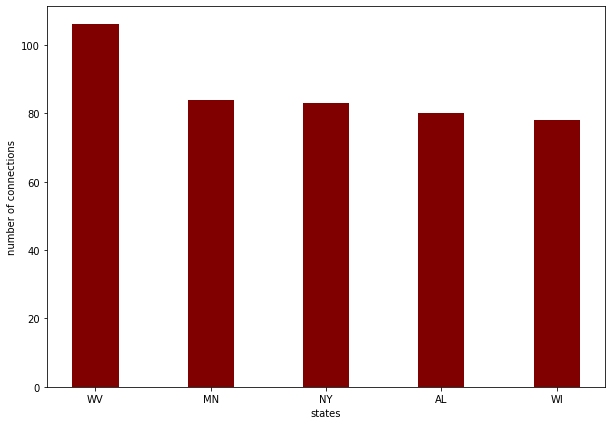

In [ ]:
#plotting the graph
fig=plt.figure(figsize=(10,7))
plt.bar(top_state_df['State'],top_state_df['s_count'],color='maroon',width=0.4)
plt.xlabel('states')
plt.ylabel('number of connections')
plt.show()

From the above table we can say that WV(West Virginia) state is utilising much telephone services

In [ ]:
#getting descriptions of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [ ]:
# we need to explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

so firstly let us find how many of them had left the service

In [ ]:
print(df['Churn'].value_counts()[True])

483


In [ ]:
#percentage of customer churn anually who shifted to other service
percentage=pd.DataFrame(df['Churn'].value_counts(normalize=True).mul(100).astype(str)+'%')
percentage

,Churn
False,85.5085508550855%
True,14.491449144914492%


Text(0.5, 1.0, 'count of target variable')

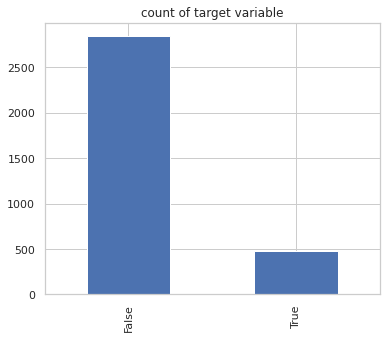

In [ ]:
#plotting the value counts of percentage churn in bar graph 
df['Churn'].value_counts().plot(kind='bar',figsize=(6,5))
plt.title('count of target variable')

**Visualizing through the bar graph it is shown that the count of the customer churn is 483 which is 14.49% churn rate** 

In [ ]:
#observing the top states in which customers want to switch to other services
df[df['Churn']==True].groupby(['State','Churn']).size().reset_index(name='count').sort_values(by=['count'],ascending=False).head()

,State,Churn,count
31,NJ,True,18
43,TX,True,18
20,MD,True,17
22,MI,True,16
23,MN,True,15


**From the above dataframe, the customer churn is seen more in New Jersey(NJ) and Texas(TX) where customers are at high risk of churn**

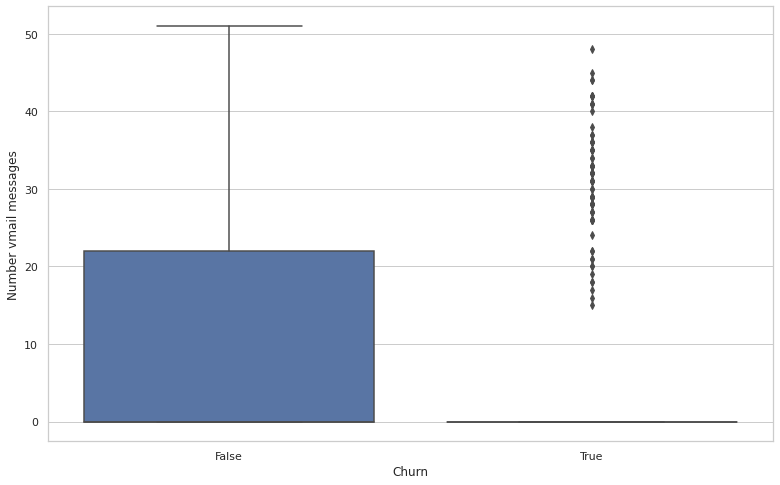

In [ ]:
#churn vs number of vmail messages
plt.figure(figsize=(13,8))
sns.set(style = 'whitegrid')
sns.boxplot(data=df ,x='Churn',y='Number vmail messages')
plt.show()


**On an average the churn rate is true as the number of vmail messages when 20 and above, customer churn is more likely to be true. Therefore when the number of vmail messages is more the probability of customer churn is more.**

In [8]:
#reading the rows when customer has international plan
df[df['International plan']=='Yes']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3309,VT,100,408,Yes,No,0,219.4,112,37.30,225.7,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
3317,SD,163,415,Yes,No,0,197.2,90,33.52,188.5,113,16.02,211.1,94,9.50,7.8,8,2.11,1,False
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True


In [9]:
#creating a dataframe to observe the churn when one has international plan and one without it
pd.crosstab(df['Churn'],df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


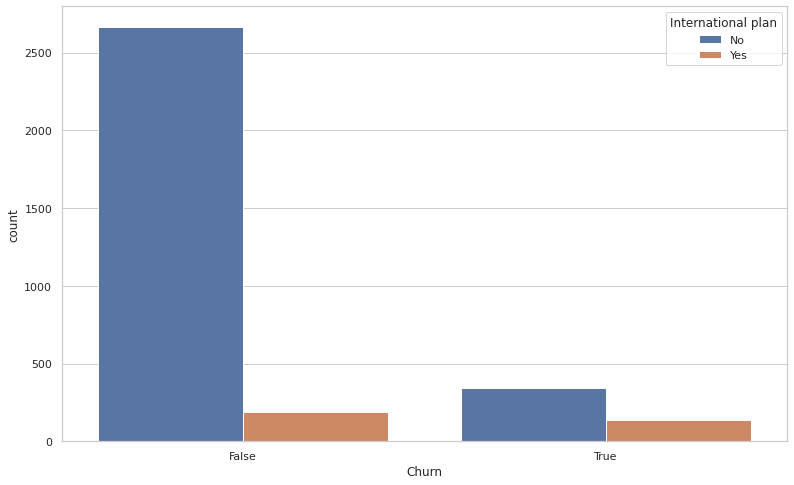

In [ ]:
#plotting the above crosstab in count plot for better understanding 
plt.figure(figsize=(13,8))
sns.set(style = 'whitegrid')
sns.countplot(x="Churn", hue="International plan", data=df)

**As we can see when the churn is true the propability of  the customers not having international plan is more compared to that customers with international plan when churn is false**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


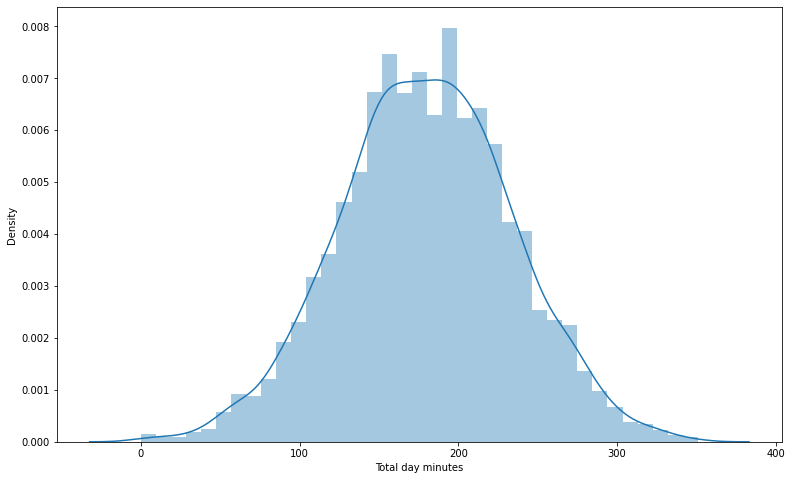

In [10]:
#observing the distribution of data values of the total day minutes
plt.figure(figsize=(13,8))
sns.distplot(df['Total day minutes'])
plt.show()

The data is distributed in the form of normal distribution with mean value nearly 200

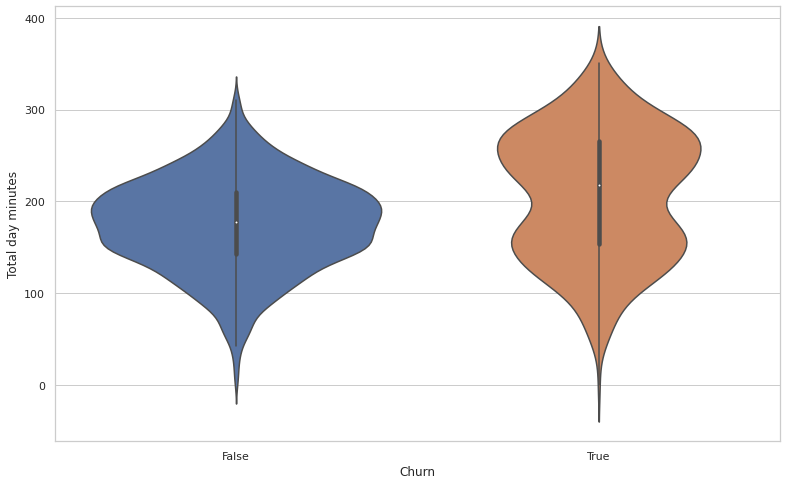

In [ ]:
#comparision between total day minutes and churn
plt.figure(figsize=(13,8))
sns.violinplot(x='Churn', y='Total day minutes',data=df,width=0.8,alpha=0.8)
plt.show()

As we can see when the total day minutes is above 200 minutes, the propability of customer churn is more likely to cut the service

In [ ]:
#reding all the max values of all the columns of the dataset
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

In [ ]:
#finding the mean value of customer service calls when churn is true
df[df['Churn']==True]['Customer service calls'].mean()

2.229813664596273

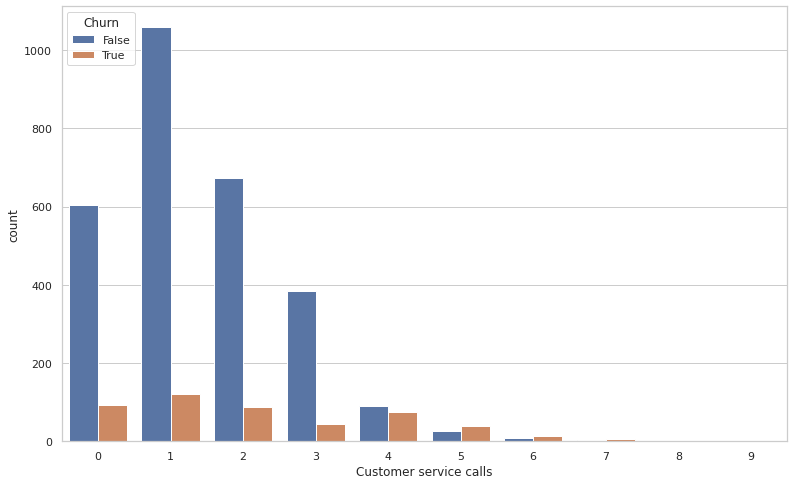

In [11]:
#plotting bargraph containing counts of customer service calls for churn
plt.figure(figsize=(13,8))
sns.set(style = 'whitegrid')
sns.countplot(x='Customer service calls',hue='Churn',data=df)

when customer service calls is 4 and above the rate of customer churn is more 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


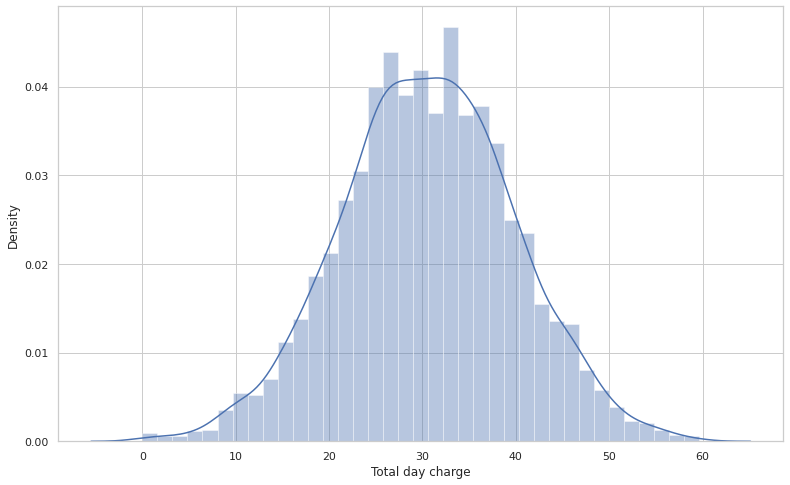

In [ ]:
#observing the distribution of data values of total day charge
plt.figure(figsize=(13,8))
sns.distplot(df['Total day charge'])
plt.show()

The mean daily charge is 30 minutes and the plot is a normal distribution

In [ ]:
#reading the total day charge for price range information and then to analyse with respect to churn
df['Total day charge'].sort_values(ascending=False)

365     59.64
985     58.96
2594    58.70
156     57.36
605     57.04
        ...  
1986     1.34
2753     1.33
2736     0.44
1397     0.00
1345     0.00
Name: Total day charge, Length: 3333, dtype: float64

from the above table the total charge per day is going till 59.64 and the range may impact the customers shifting to another service,let's understang further by plotting box plot 

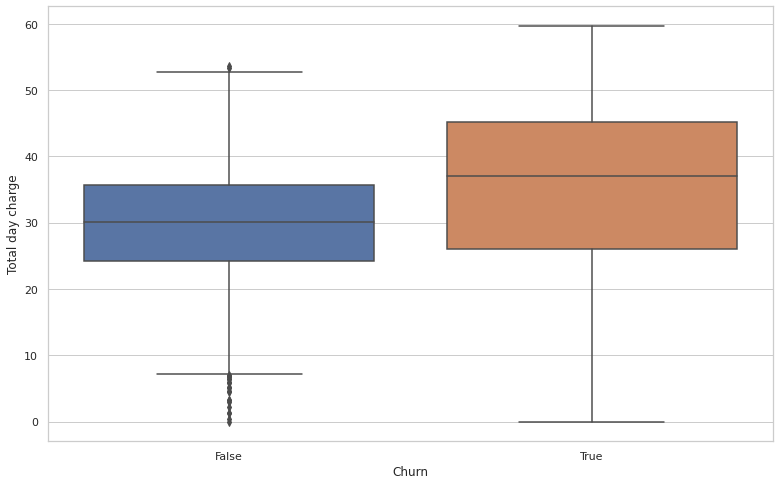

In [ ]:
#visualizing the churn by comparing to total day charge by plotting the box plot
plt.figure(figsize=(13,8))
sns.boxplot(x='Churn', y='Total day charge',data=df,width=0.8)
plt.show()

from the above visualised bot plot when the charge per day is 30 and more the customers leaving the present telecom service is true as the price grow up,the reason may be because of the better service avilability with lesser price in the market 

In [ ]:
#reading the dataset of only column total intl minutes to know the price range   
df['Total intl minutes'].sort_values(ascending=False)

115     20.0
314     18.9
1816    18.4
2816    18.3
2371    18.2
        ... 
2362     0.0
343      0.0
2906     0.0
2345     0.0
1028     0.0
Name: Total intl minutes, Length: 3333, dtype: float64

total initial minutes starts from zero reaching till 20 minutes and analysing it with churn if it affect the customer churn 

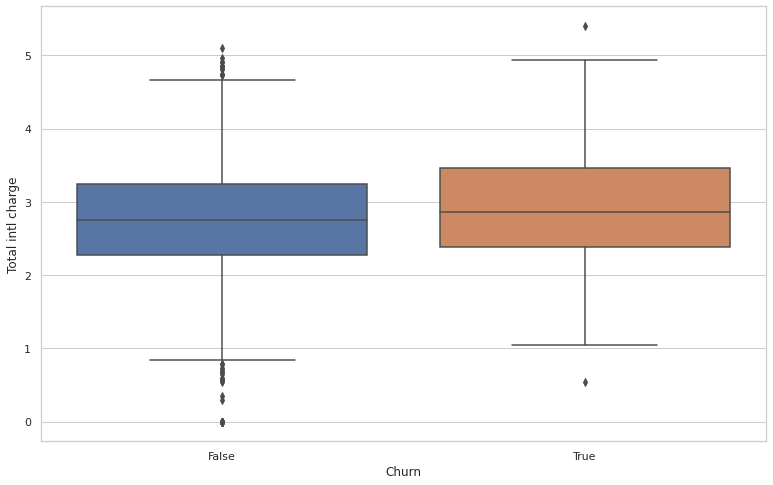

In [ ]:
#churn vs total intl charge
plt.figure(figsize=(13,8))
sns.boxplot(x='Churn', y='Total intl charge',data=df,width=0.8)
plt.show()

In [ ]:
#grouping the columns of total ev charge and churn for deciding churn for the total evening charge 
new = df.groupby(['Total eve charge','Churn']).size()
display(new)

Total eve charge  Churn
0.00              False    1
2.65              False    1
3.59              False    1
3.61              False    1
3.73              False    1
                          ..
29.83             True     1
29.89             False    1
30.11             False    1
30.75             False    1
30.91             True     1
Length: 1753, dtype: int64

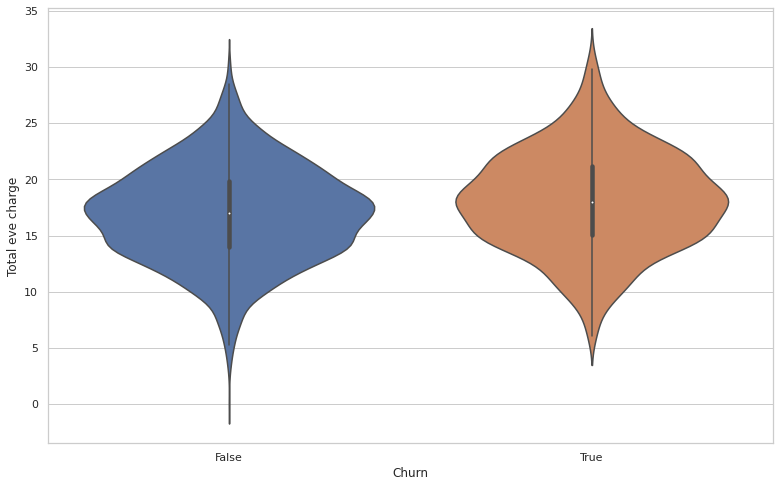

In [ ]:
#understanding the above table better by plotting them in the form of voilin plot
plt.figure(figsize=(13,8))
sns.violinplot(x='Churn', y='Total eve charge',data=df,width=0.8,alpha=0.8)
plt.show()

we don't see much significant relation of the customer churning with respect to total evening charge as both the graphs looks similar. \
But we can conclude that as the evening charge increase from 20,customer churn is high when it is compare with false churn

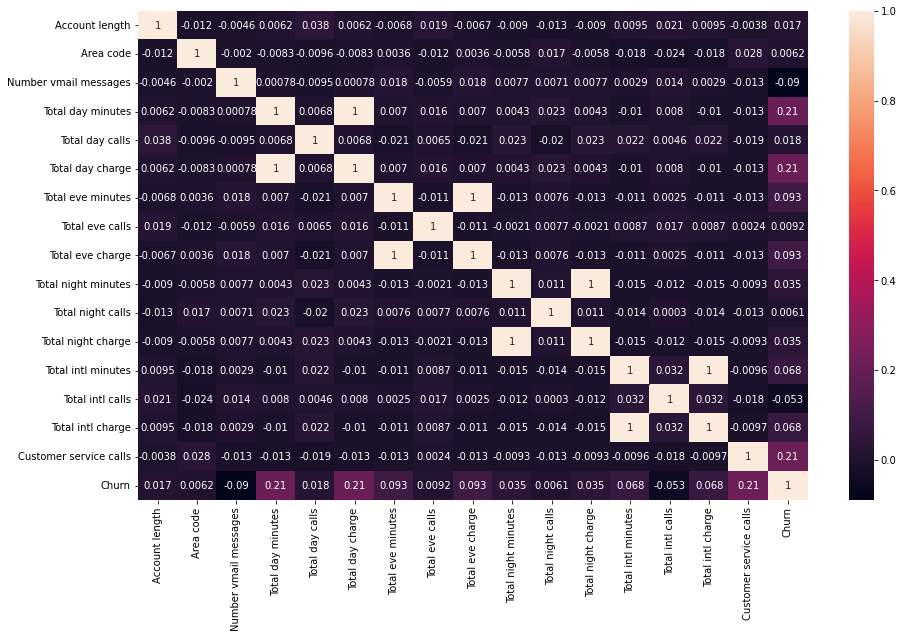

In [ ]:
#plotting corelation map
plt.figure(figsize=(15,9))
df_plot= sns.heatmap(df.corr(),annot=True)
plt.show()

From the above heat map we can correlate for the every column to check if any of the variables have a strong correlation to each other. \
we see that there is a stong relation between churn and (total day minutes,customer service calls,total day charge) 

**Conclusion:**



*   It is observed that churn rate is much higher in the case of customers who have opted for international plans. It can be inferred that the international plans of the company may not be reasonably priced, or their quality may not be at par with the competitors.

*   Box plot, violin plot and bar graph are complimenting each other from their findings.

*   When the total day minutes is above 200 minutes, the probability of customer churn is more likely to occur.

*   The churn rate is maximum when the international cost is more than 3 and the highest international charge is 5.40.

*  As the call duration becomes higher, possibility of churning also becomes higher. It might be due to poorly or unrealistically priced long duration plans.

*   When the average customer service calls are more than 3, it is likely to a customer change the telecom operator.

*   There is no significant relation between churn and (total evening charge,total international charge).

* Plotting heat map to conclude strength of relation for diffrent factors and it is observed that International plan and customer service calls columns are more related with customer churning.
  








